TASK 1

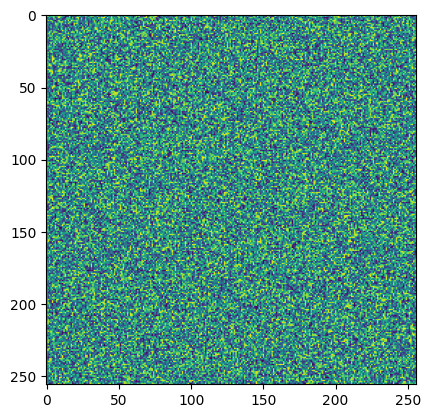

In [1]:
import cv2
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Load the image
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

# Perform FFT on the image
f_transform = np.fft.fft2(image)
fshift = np.fft.fftshift(f_transform)

# Display the FFT image
cv2.imshow('Filtered Image', np.abs(fshift.astype(np.uint8)))
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(np.abs(fshift.astype(np.uint8)))

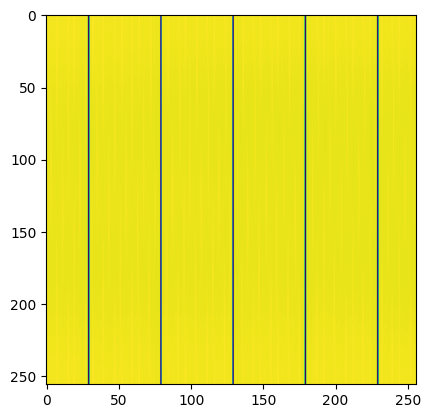

In [2]:
# Create a horizontal line filter
rows, cols = image.shape
filter = np.zeros_like(image)

filter[rows // 2 - 2:rows // 2 + 2, :] = 1

# Apply the filter in the frequency domain
filtered_image = fshift * filter
filtered_image = np.fft.ifftshift(filtered_image)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

# Display the filtered image
cv2.imshow('Horizontal Line Filtered Image', filtered_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(filtered_image)


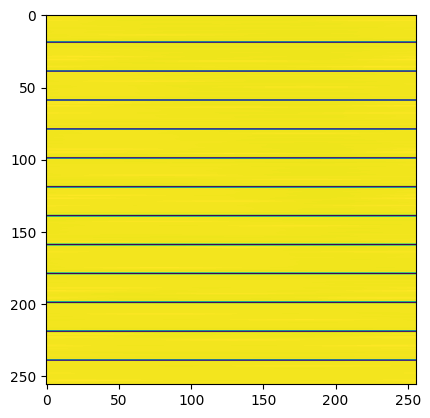

In [3]:
# Create a vertical line filter
filter = np.zeros_like(image)
filter[:, cols // 2 - 2:cols // 2 + 2] = 1

# Apply the filter in the frequency domain
filtered_image = fshift * filter
filtered_image = np.fft.ifftshift(filtered_image)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

# Display the filtered image
cv2.imshow('Vertical Line Filtered Image', filtered_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(filtered_image)

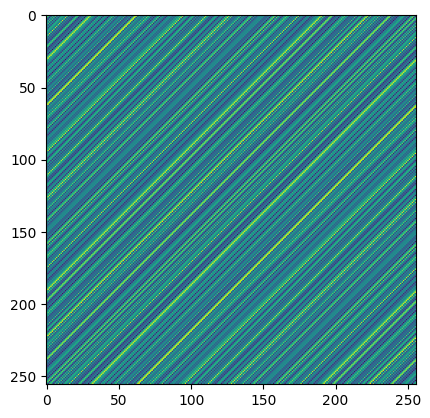

In [4]:
# Create a diagonal line filter
filter = np.zeros_like(image)
np.fill_diagonal(filter, 1)

# Apply the filter in the frequency domain
filtered_image = fshift * filter
filtered_image = np.fft.ifftshift(filtered_image)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

# Display the filtered image
cv2.imshow('Diagonal Line Filtered Image', filtered_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(filtered_image)

TASK 2

In [7]:
# Define the filters
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

prewitt_horizontal_kernel = np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]])

prewitt_vertical_kernel = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])

sobel_horizontal_kernel = np.array([[-1, -2, -1],
                                    [0, 0, 0],
                                    [1, 2, 1]])

sobel_vertical_kernel = np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]])

average_kernel = np.ones((3, 3), np.float32) / 9  # 3x3 average filter

In [8]:
filters = [laplacian_kernel,prewitt_horizontal_kernel,prewitt_vertical_kernel,sobel_horizontal_kernel,sobel_vertical_kernel,average_kernel]
names = ["laplacian_kernel","prewitt_horizontal_kernel","prewitt_vertical_kernel","sobel_horizontal_kernel","sobel_vertical_kernel","average_kernel"]

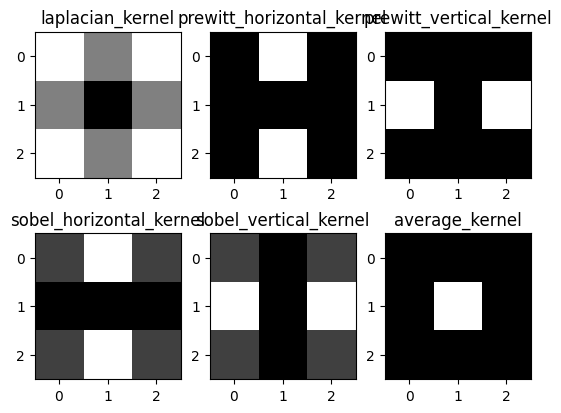

In [11]:
for name, filter in zip(names, filters):
    f_transform = np.fft.fft2(filter)
    fshift = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(fshift)

    # Display the image in a subplot
    plt.subplot(2, 3, names.index(name) + 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(name)

plt.show()

TASK 3


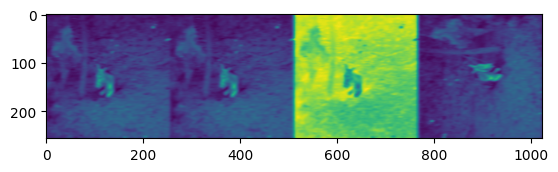

In [12]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Stacked_img.jpeg', cv2.IMREAD_GRAYSCALE)

# Perform FFT on the image
f_transform = np.fft.fft2(image)
fshift = np.fft.fftshift(f_transform)

# Create a Gaussian blur filter in the frequency domain
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
D = 50  # Blur radius
H = np.zeros_like(image, dtype=complex)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        H[i, j] = np.exp(-dist**2 / (2 * D**2))

# Apply the filter in the frequency domain
filtered_image = fshift * H
filtered_image = np.fft.ifftshift(filtered_image)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

# Display the filtered image
cv2.imshow('Filtered Image', filtered_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(filtered_image)

TASK 4

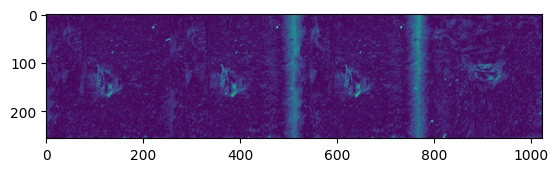

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Stacked_img.jpeg', cv2.IMREAD_GRAYSCALE)

# Perform FFT on the image
f_transform = np.fft.fft2(image)
fshift = np.fft.fftshift(f_transform)

# Create a filter to enhance edges (e.g., high-pass filter)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Define the size of the high-pass filter
D = 10

# Create a high-pass filter in the frequency domain
H = np.zeros_like(image, dtype=complex)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        if dist > D:
            H[i, j] = 1

# Apply the filter in the frequency domain
filtered_image = fshift * H
filtered_image = np.fft.ifftshift(filtered_image)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

# Display the filtered image
cv2.imshow('Filtered Image', filtered_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(filtered_image)